# Loading the dataset

In [36]:
%matplotlib inline 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv('network_backup_dataset.csv')
# print(raw_data)
# print(raw_data.loc[0])
# print(raw_data.loc[1])

# Preprocess raw_data to data (numerical representation)
weekdays = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data = np.zeros(raw_data.shape)
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        if j == 1: # Day of week
            data[i][j] = float(weekdays[raw_data.loc[i]['Day of Week']])
        elif j == 3: # workflow id
            data[i][j] = float(raw_data.loc[i]['Work-Flow-ID'].split('_')[-1])
        elif j == 4: # file name id
            data[i][j] = float(raw_data.loc[i]['File Name'].split('_')[-1])
        else:
            data[i][j] = float(raw_data.loc[i][j])

# print(data)

a) For a twenty-day period (X-axis unit is day number) plot the backup sizes for
all workflows (color coded on the Y-axis)

In [46]:
# raw_data.loc[(raw_data['Week #'] == 1) & (raw_data['Day of Week'] == 'Monday')]
# np.sum(data[(data[:,0] == 1) & (data[:,1] == 1) & (data[:,3] == 0)], axis=0)[5]

3.8777910233947495

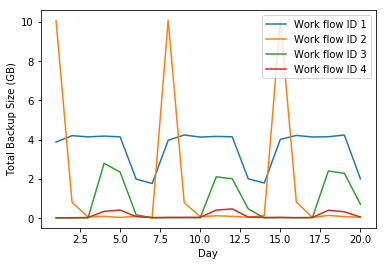

In [55]:
days = np.arange(1,21) # 20 day period
for wid in range(4): # 5 workflows
    sizes = []
    for d in days:
        week, week_day = ((int(d / 7) + 1, int(d % 7)) if int(d % 7) is not 0 else (int(d / 7), 7))
#         print(week, week_day)
        total_size = np.sum(data[(data[:,0] == week) & (data[:,1] == week_day) & (data[:,3] == wid)], axis=0)[5]
        sizes.append(total_size)
    plt.plot(days, sizes, label='Work flow ID %i' % (wid + 1))
    plt.xlabel('Day')
    plt.ylabel('Total Backup Size (GB)')
    plt.legend()

plt.show()

b) Do the same plot for the first 105-day period. Can you identify any repeating patterns?

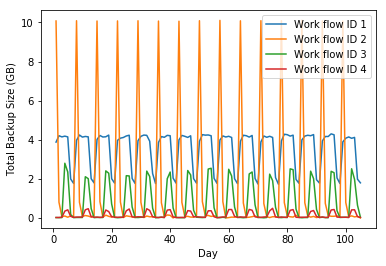

In [56]:
days = np.arange(1,106) # 20 day period
for wid in range(4): # 5 workflows
    sizes = []
    for d in days:
        week, week_day = ((int(d / 7) + 1, int(d % 7)) if int(d % 7) is not 0 else (int(d / 7), 7))
#         print(week, week_day)
        total_size = np.sum(data[(data[:,0] == week) & (data[:,1] == week_day) & (data[:,3] == wid)], axis=0)[5]
        sizes.append(total_size)
    plt.plot(days, sizes, label='Work flow ID %i' % (wid + 1))
    plt.xlabel('Day')
    plt.ylabel('Total Backup Size (GB)')
    plt.legend()

plt.show()

All the work flows have a very clear pattern of a spike in total backup size every week. For example, the work flow 2 consistently reaches a total backup size of 10G

# Prediction of backup size